# Import data and library

In [0]:
import pandas as pd
import zipfile
import re
from google.colab import files
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
import numpy as np

In [0]:
uploaded = files.upload()

Saving NewSentiment.zip to NewSentiment.zip


In [0]:
!unzip 'NewSentiment.zip'

Archive:  NewSentiment.zip
   creating: Sentiment/
  inflating: Sentiment/stopword_list_TALA.txt  
  inflating: Sentiment/key_norm.csv  
  inflating: Sentiment/dictionary.csv  
  inflating: Sentiment/data_latih.json  


In [0]:
df = pd.read_json (r'Sentiment/data_latih.json')
df.head()

,akun,id_user,isi,sentimen,tanggal
0,@AhokDjarot,823082326213021696,RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...,netral,Tue Apr 04 14:04:05 +0000 2017
1,@AhokDjarot,3166296157,@AhokDjarot Melayani warga jakarta mulai dari ...,positif,Tue Apr 04 14:00:01 +0000 2017
2,@AhokDjarot,799108167170949121,@Lintank01 @AhokDjarot Golongan sumbu pendek l...,negatif,Tue Apr 04 13:56:37 +0000 2017
3,@AhokDjarot,710566116553166849,RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...,positif,Tue Apr 04 13:52:44 +0000 2017
4,@AhokDjarot,1335669534,Prof. Edward Omar Sharif H. (Ahli Pidana) : Me...,positif,Tue Apr 04 13:50:01 +0000 2017


# Preprocessing

### Drop Colomn yang tidak diperlukan

In [0]:
df.drop(['akun', 'id_user', 'tanggal'], axis=1, inplace=True)
df.head()

,isi,sentimen
0,RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...,netral
1,@AhokDjarot Melayani warga jakarta mulai dari ...,positif
2,@Lintank01 @AhokDjarot Golongan sumbu pendek l...,negatif
3,RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...,positif
4,Prof. Edward Omar Sharif H. (Ahli Pidana) : Me...,positif


### Modelkan colomn sentimen dalam number

In [0]:
# 0 - Netral
# 1 - Positif
# 2 - Negatif
df['sentimen_num'] = df.sentimen.map({'netral':0, 'positif':1, 'negatif':2})
df.head()

,isi,sentimen,sentimen_num
0,RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...,netral,0
1,@AhokDjarot Melayani warga jakarta mulai dari ...,positif,1
2,@Lintank01 @AhokDjarot Golongan sumbu pendek l...,negatif,2
3,RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...,positif,1
4,Prof. Edward Omar Sharif H. (Ahli Pidana) : Me...,positif,1


### Melihat jumlah karakter tiap tweet

In [0]:
df['pre_clean_len'] = [len(t) for t in df.isi]
df.head()

,isi,sentimen,sentimen_num,pre_clean_len
0,RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...,netral,0,140
1,@AhokDjarot Melayani warga jakarta mulai dari ...,positif,1,123
2,@Lintank01 @AhokDjarot Golongan sumbu pendek l...,negatif,2,131
3,RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...,positif,1,140
4,Prof. Edward Omar Sharif H. (Ahli Pidana) : Me...,positif,1,120


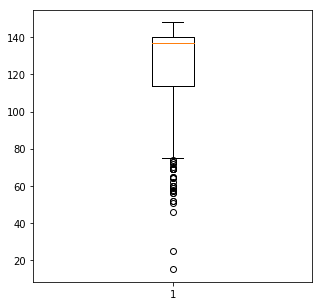

In [0]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [0]:
df[df.pre_clean_len > 140].head(10)

,isi,sentimen,sentimen_num,pre_clean_len
43,2x nonton #AhokDjarotDiRosi di Kompas TV msh a...,positif,1,143
44,https://t.co/U7IfG9i8Og Pak Ahok hatinya baik ...,positif,1,144
122,RT @AhokDjarot: Tetap dukung Basuki-Djarot dgn...,positif,1,144
125,RT @AhokDjarot: Terimakasih teman2 yang sudah ...,positif,1,143
138,RT @AhokDjarot: Tetap dukung Basuki-Djarot dgn...,positif,1,144
141,RT @jotriatman: Saling mencintai memang awal h...,positif,1,144
202,"RT @AhokDjarot: ""Saya titipkan Ahok &amp; Djar...",negatif,2,144
222,Fakta Kebrutalan @ahokdjarot Penindasan kpd Ra...,negatif,2,144
232,RT @andreOPA: Menurut lo Afgan &amp; Maia lagi...,negatif,2,144
250,"RT @Ha_Elaaah: Alhamduliah, berkat program ""Ro...",positif,1,144


In [0]:
df.drop(['pre_clean_len'], axis=1, inplace=True)
df.head()

,isi,sentimen,sentimen_num
0,RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...,netral,0
1,@AhokDjarot Melayani warga jakarta mulai dari ...,positif,1
2,@Lintank01 @AhokDjarot Golongan sumbu pendek l...,negatif,2
3,RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...,positif,1
4,Prof. Edward Omar Sharif H. (Ahli Pidana) : Me...,positif,1


### Remove karakter tidak diperlukan




In [0]:
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [0]:
df['isi'] = df['isi'].apply(lambda text: tweet_cleaner(text))
df.head()

,isi,sentimen,sentimen_num
0,rt penasaran sama basukidjarot punya pertanyaa...,netral,0
1,melayani warga jakarta mulai dari lahir dengan...,positif,1
2,golongan sumbu pendek lo fpi piaraan kluarga c...,negatif,2
3,rt pak ahok itu didzolimi aku yakin pak ahok b...,positif,1
4,prof edward omar sharif h ahli pidana menurut ...,positif,1


### Normalisai Kata tidak baku

In [0]:
norm = pd.read_csv("Sentiment/key_norm.csv")

norm_dic = pd.Series(norm.hasil.values,index=norm.singkat).to_dict()

def replace_norm(text):
    text_tokenized = nltk.word_tokenize(text.lower())
    text = " ".join(word if word not in norm_dic else norm_dic[word] for word in text_tokenized)
    return text 

In [0]:
df["isi"] = df["isi"].apply(lambda x: replace_norm(x))
df.head()

,isi,sentimen,sentimen_num
0,rt penasaran sama basukidjarot punya pertanyaa...,netral,0
1,melayani warga jakarta mulai dari lahir dengan...,positif,1
2,golongan sumbu pendek kamu fpi piaraan keluarg...,negatif,2
3,rt pak ahok itu didzolimi saya yakin pak ahok ...,positif,1
4,prof edward omar sharif h ahli pidana menurut ...,positif,1


### Stopword Removal


In [0]:
import io

with io.open('Sentiment/stopword_list_TALA.txt', encoding="utf-8") as f:
  text = f.read().lower()

stopword = nltk.word_tokenize(text)

def stopword_remove(text):
    text_tokenized = nltk.word_tokenize(text.lower())
    text = " ".join(text for text in text_tokenized if text not in stopword)
    return text

In [0]:
df["isi"] = df["isi"].apply(lambda x: stopword_remove(x))
df.head()

,isi,sentimen,sentimen_num
0,penasaran basukidjarot pertanyaankepo kepoinpe...,netral,0
1,melayani warga jakarta lahir program freeahok btp,positif,1
2,golongan sumbu pendek fpi piaraan keluarga cen...,negatif,2
3,ahok didzolimi ahok bebas freeahok btp,positif,1
4,prof edward omar sharif h ahli pidana pndpt ah...,positif,1


# WordCloud Visulizatuin tiap class

### WordCloud Netral Tweet

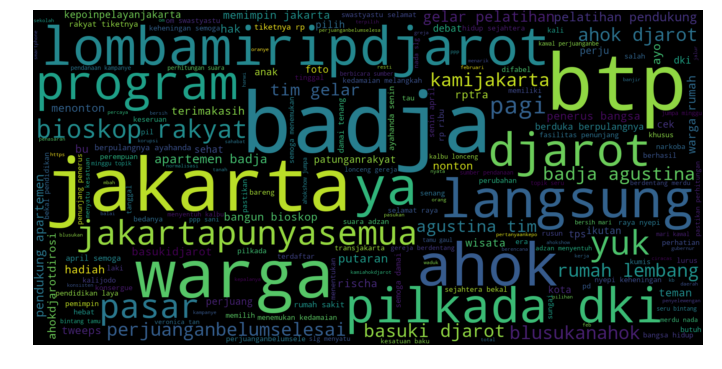

In [0]:
netral_tweets = df[df.sentimen_num == 0]
netral_string = []
for t in netral_tweets.isi:
    netral_string.append(t)
netral_string = pd.Series(netral_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(netral_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### WordCloud Positive Tweet

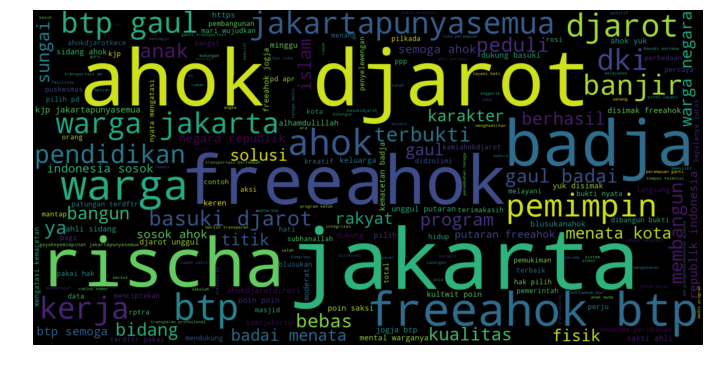

In [0]:
positif_tweets = df[df.sentimen_num == 1]
positif_string = []
for t in positif_tweets.isi:
    positif_string.append(t)
positif_string = pd.Series(positif_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(positif_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### WordCloud Negative Tweet

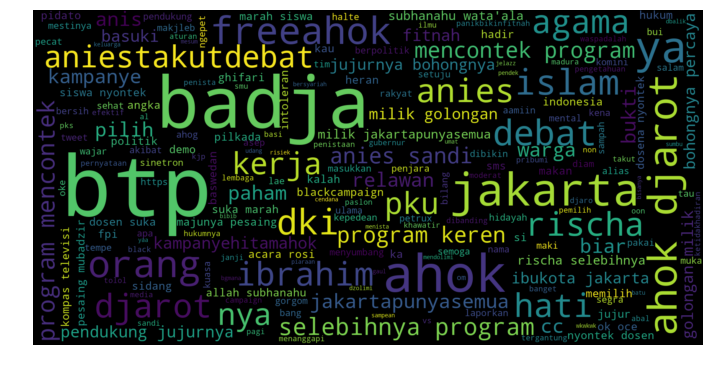

In [0]:
negative_tweets = df[df.sentimen_num == 2]
negative_string = []
for t in negative_tweets.isi:
    negative_string.append(t)
negative_string = pd.Series(negative_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(negative_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Feature Extraction

In [0]:
from sklearn.model_selection import train_test_split

X = df['isi']
y = df['sentimen_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((520,), (130,), (520,), (130,))

### Bag of Words

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)
X_train_cv.shape,X_test_cv.shape

((520, 1428), (130, 1428))

### Tf-Idf

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
X_train_tfidf.shape, X_test_tfidf.shape

((520, 1428), (130, 1428))

# Classification

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

## 1.1 Naive Bayes with Bag of Words Feature

In [0]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train_cv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
pred_nb_cv = clf_nb.predict(X_test_cv)
print("Accuracy Naive Bayes with Bag of Words Feature: ",accuracy_score(y_test, pred_nb_cv))

Accuracy Naive Bayes with Bag of Words Feature:  0.6692307692307692


### 10 Fold Cross validation Above Model

In [0]:
def cros_val_10(clf, X_train):
  scores = cross_validate(clf, X_train, y_train, cv=10)
  sum_acc = scores['test_score']
  for i in range(10):
    print("Fold {0} accuracy: {1}".format(i+1, sum_acc[i]))
  print("Mean Accuracy: {0}".format(np.mean(sum_acc)))

In [0]:
cros_val_10(clf_nb, X_train_cv)

Fold 1 accuracy: 0.660377358490566
Fold 2 accuracy: 0.6981132075471698
Fold 3 accuracy: 0.660377358490566
Fold 4 accuracy: 0.6981132075471698
Fold 5 accuracy: 0.8076923076923077
Fold 6 accuracy: 0.6153846153846154
Fold 7 accuracy: 0.5961538461538461
Fold 8 accuracy: 0.7647058823529411
Fold 9 accuracy: 0.6470588235294118
Fold 10 accuracy: 0.66
Mean Accuracy: 0.6807976607188594


## 1.2 Naive Bayes with TF-IDF Feature

In [0]:
clf_nb_1 = MultinomialNB()
clf_nb_1.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
pred_nb_tf = clf_nb_1.predict(X_test_tfidf)
print("Accuracy Naive Bayes with TF-IDF Feature: ",accuracy_score(y_test, pred_nb_tf))

Accuracy Naive Bayes with TF-IDF Feature:  0.5846153846153846


### 10 Fold Cross validation Above Model

In [0]:
cros_val_10(clf_nb_1, X_train_tfidf)

Fold 1 accuracy: 0.5660377358490566
Fold 2 accuracy: 0.6415094339622641
Fold 3 accuracy: 0.660377358490566
Fold 4 accuracy: 0.6037735849056604
Fold 5 accuracy: 0.6923076923076923
Fold 6 accuracy: 0.5192307692307693
Fold 7 accuracy: 0.5769230769230769
Fold 8 accuracy: 0.6274509803921569
Fold 9 accuracy: 0.6078431372549019
Fold 10 accuracy: 0.64
Mean Accuracy: 0.6135453769316144


##  2.1 SVM with Bag of Words Feature

In [0]:
clf_svm = svm.SVC(kernel='linear') # Linear Kernel

clf_svm.fit(X_train_cv, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
pred_svm_cv = clf_svm.predict(X_test_cv)
print("Accuracy SVM with Bag of word Feature: ",accuracy_score(y_test, pred_svm_cv))

Accuracy SVM with Bag of word Feature:  0.6461538461538462


### 10 Fold Cross validation Above Model

In [0]:
cros_val_10(clf_svm, X_train_cv)

Fold 1 accuracy: 0.6792452830188679
Fold 2 accuracy: 0.6415094339622641
Fold 3 accuracy: 0.6226415094339622
Fold 4 accuracy: 0.7547169811320755
Fold 5 accuracy: 0.8076923076923077
Fold 6 accuracy: 0.6153846153846154
Fold 7 accuracy: 0.5384615384615384
Fold 8 accuracy: 0.7843137254901961
Fold 9 accuracy: 0.6666666666666666
Fold 10 accuracy: 0.72
Mean Accuracy: 0.6830632061242494


## 2.2 SVM with TF-IDF Feature

In [0]:
clf_svm_1 = svm.SVC(kernel='linear') # Linear Kernel

clf_svm_1.fit(X_train_tfidf, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
pred_svm_tfidf = clf_svm_1.predict(X_test_tfidf)
print("Accuracy SVM with TF-IDF Feature: ",accuracy_score(y_test, pred_svm_tfidf))

Accuracy SVM with TF-IDF Feature:  0.6461538461538462


### 10 Fold Cross validation Above Model

In [0]:
cros_val_10(clf_svm_1, X_train_tfidf)

Fold 1 accuracy: 0.6226415094339622
Fold 2 accuracy: 0.7169811320754716
Fold 3 accuracy: 0.6792452830188679
Fold 4 accuracy: 0.660377358490566
Fold 5 accuracy: 0.7692307692307693
Fold 6 accuracy: 0.6346153846153846
Fold 7 accuracy: 0.5384615384615384
Fold 8 accuracy: 0.7058823529411765
Fold 9 accuracy: 0.6274509803921569
Fold 10 accuracy: 0.68
Mean Accuracy: 0.6634886308659892


## 3.1 Random Forests with Bag of Words Feature

In [0]:
clf_rf =RandomForestClassifier(n_estimators=100)

clf_rf.fit(X_train_cv, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pred_rf_cv = clf_rf.predict(X_test_cv)
print("Accuracy Random Forest with Bag of Words Feature: ",accuracy_score(y_test, pred_rf_cv))

Accuracy Random Forest with Bag of Words Feature:  0.6384615384615384


### 10 Fold Cross validation Above Model

In [0]:
cros_val_10(clf_rf, X_train_cv)

Fold 1 accuracy: 0.6226415094339622
Fold 2 accuracy: 0.6981132075471698
Fold 3 accuracy: 0.660377358490566
Fold 4 accuracy: 0.5849056603773585
Fold 5 accuracy: 0.6730769230769231
Fold 6 accuracy: 0.5192307692307693
Fold 7 accuracy: 0.5769230769230769
Fold 8 accuracy: 0.7058823529411765
Fold 9 accuracy: 0.6470588235294118
Fold 10 accuracy: 0.66
Mean Accuracy: 0.6348209681550414


## 3.2 Random Forests with TF-IDF Feature

In [0]:
clf_rf_1 =RandomForestClassifier(n_estimators=100)

clf_rf_1.fit(X_train_tfidf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pred_rf_tfidf = clf_rf_1.predict(X_test_tfidf)
print("Accuracy Random Forest with TF IDF Feature: ",accuracy_score(y_test, pred_rf_tfidf))

Accuracy Random Forest with TF IDF Feature:  0.6615384615384615


### 10 Fold Cross validation Above Model

In [0]:
cros_val_10(clf_rf_1, X_train_tfidf)

Fold 1 accuracy: 0.6226415094339622
Fold 2 accuracy: 0.660377358490566
Fold 3 accuracy: 0.6792452830188679
Fold 4 accuracy: 0.5283018867924528
Fold 5 accuracy: 0.7115384615384616
Fold 6 accuracy: 0.5769230769230769
Fold 7 accuracy: 0.5576923076923077
Fold 8 accuracy: 0.7450980392156863
Fold 9 accuracy: 0.6470588235294118
Fold 10 accuracy: 0.62
Mean Accuracy: 0.6348876746634794
